In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [5]:
df= pd.read_csv("Base.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [7]:
df["fraud_bool"]

0         0
1         0
2         0
3         0
4         0
         ..
999995    0
999996    0
999997    0
999998    0
999999    0
Name: fraud_bool, Length: 1000000, dtype: int64

In [8]:
df["fraud_bool"].value_counts()

0    988971
1     11029
Name: fraud_bool, dtype: int64

Feature Engineering for Fraud Detection of Bank Account Applications

In [9]:
new_df = df
# Create a list of categorical features in the DataFrame new_df whose data type is `object`
categorical_features = [x for x in new_df.columns if new_df[x].dtypes == "O"]

print(categorical_features)

['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']


In [10]:
new_df = pd.DataFrame(pd.get_dummies(new_df, prefix=categorical_features))

In [11]:
new_df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,housing_status_BE,housing_status_BF,housing_status_BG,source_INTERNET,source_TELEAPP,device_os_linux,device_os_macintosh,device_os_other,device_os_windows,device_os_x11
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,1059,13096.035018,...,0,0,0,1,0,1,0,0,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,1658,9223.283431,...,0,0,0,1,0,0,0,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,1095,4471.472149,...,0,0,0,1,0,0,0,0,1,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,3483,14431.993621,...,0,0,0,1,0,1,0,0,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,2339,7601.511579,...,0,0,0,1,0,0,0,1,0,0


In [12]:
# Separate the feature matrix and the target variable
X = new_df.drop(['fraud_bool'], axis=1)
y = new_df['fraud_bool']

In [13]:
numeric_features = [x for x in df.columns if df[x].nunique() >= 10]
print(numeric_features)

['name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'bank_months_count', 'proposed_credit_limit', 'session_length_in_minutes']


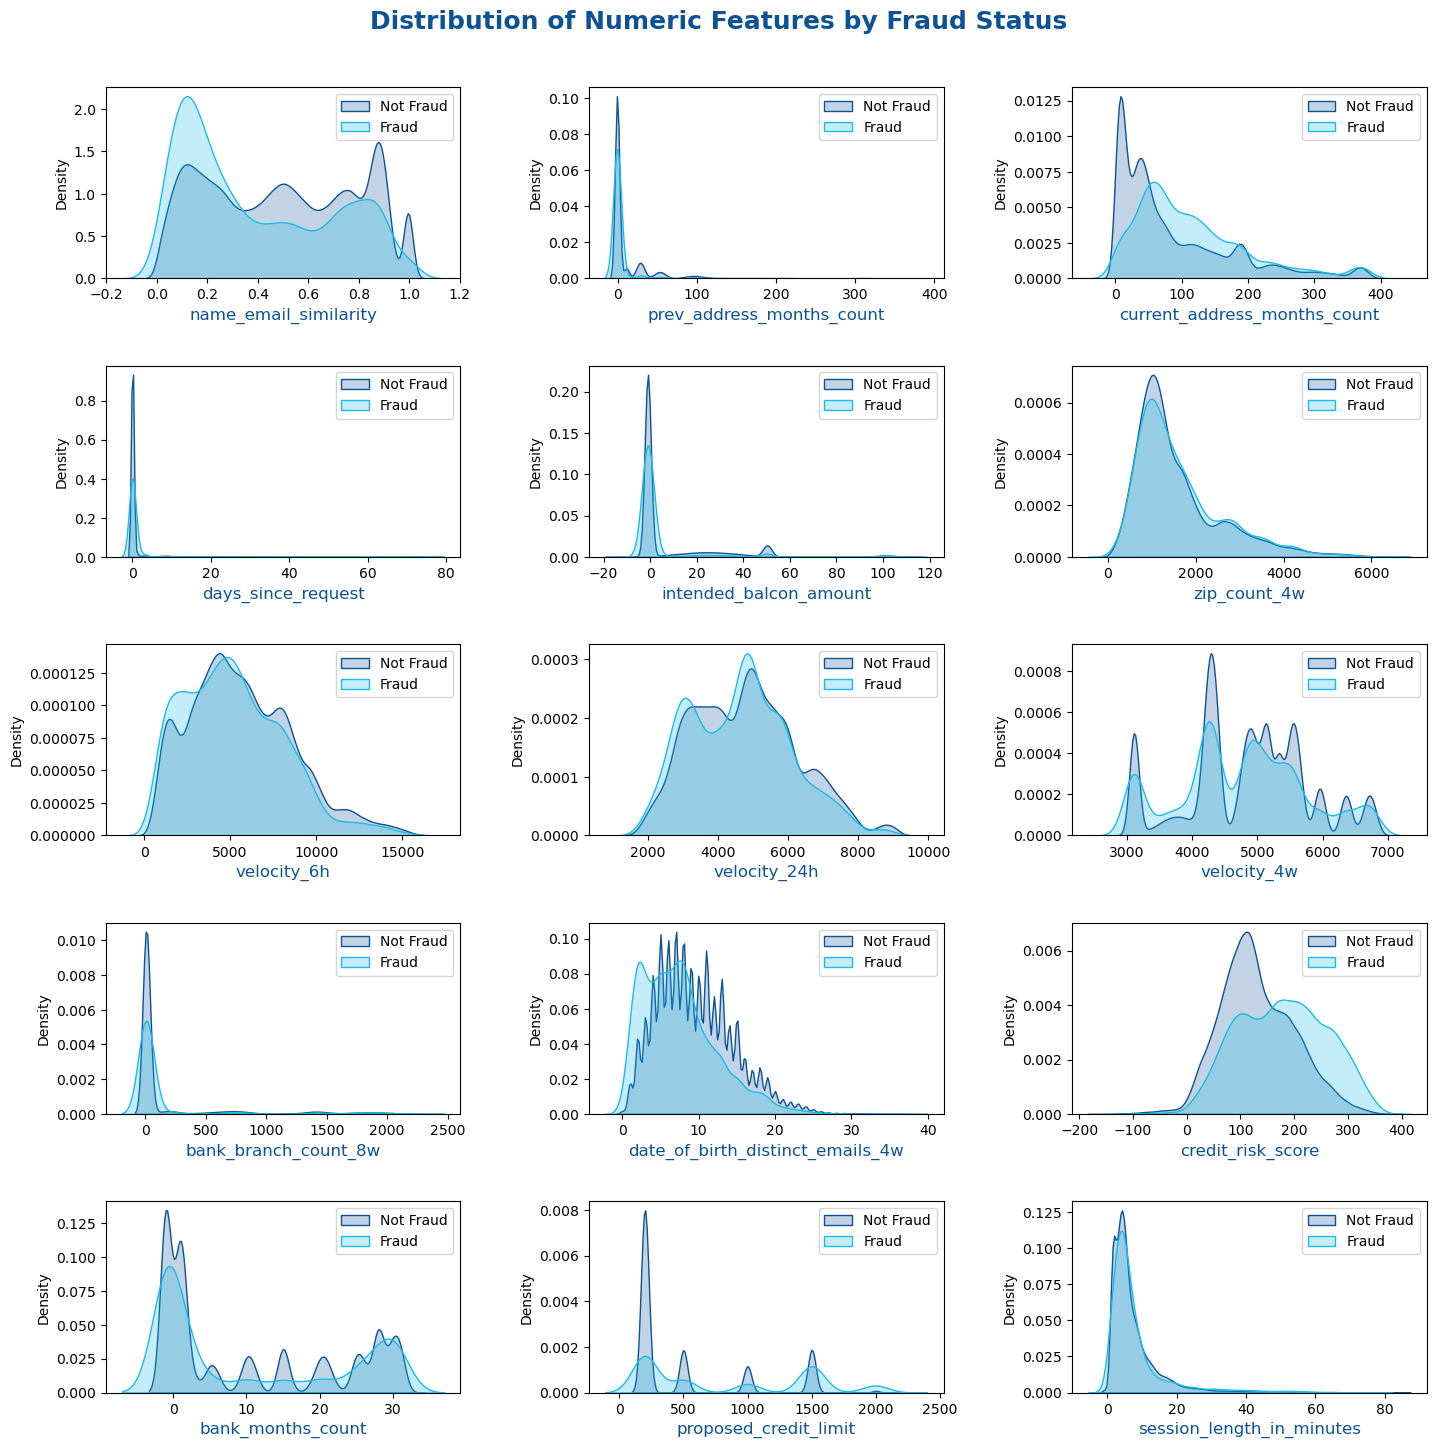

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set custom color palette
colors = ["#0b5394", "#1bbbe9"]

# Create a figure and axes with custom size
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))

# Add a title to the figure with a different font style
fig.suptitle('Distribution of Numeric Features by Fraud Status', fontsize=18, fontweight='bold', color='#0b5394')

# Loop through the numeric features and plot a kernel density plot for each feature
for i, feature in enumerate(numeric_features):
    ax = axes[i // 3][i % 3]
    
    # Plot kernel density plots with custom colors
    sns.kdeplot(data=df[df['fraud_bool'] == 0][feature], fill=True, ax=ax, color=colors[0], label='Not Fraud')
    sns.kdeplot(data=df[df['fraud_bool'] == 1][feature], fill=True, ax=ax, color=colors[1], label='Fraud')
    
    # Set labels and legend for each subplot
    ax.set_xlabel(feature, fontsize=12, color='#0b5394')
    ax.legend(fontsize=10)

# Adjust spacing between subplots and display the plot
plt.tight_layout(pad=3)
plt.show()